<a href="https://colab.research.google.com/github/xsuryanshx/Sarcasm-Detection-on-News-Headlines/blob/main/sarcasm_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
!wget https://raw.githubusercontent.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection/master/Sarcasm_Headlines_Dataset.json

--2020-12-26 20:41:12--  https://raw.githubusercontent.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection/master/Sarcasm_Headlines_Dataset.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6057046 (5.8M) [text/plain]
Saving to: ‘Sarcasm_Headlines_Dataset.json’

Sarcasm_Headlines_D 100%[===================>]   5.78M  --.-KB/s    in 0.1s    

2020-12-26 20:41:13 (46.0 MB/s) - ‘Sarcasm_Headlines_Dataset.json’ saved [6057046/6057046]



In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import re
!pip install wordninja
import wordninja

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [86]:
data = pd.read_json('/content/Sarcasm_Headlines_Dataset.json', lines=True)
df = pd.DataFrame(data)

In [89]:
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [103]:
new_heading = []
for i in df['headline']:
  i = re.sub("[^a-zA-Z']", ' ',i)
  i = re.sub("[']", '',i).replace('  ',' ')
  sent = i.lower().split()
  new_sent = []
  for i in sent:
    for i in wordninja.split(i):
      new_sent.append(i)
  for j in range(len(new_sent)):
    new_sent[j] = lemmatizer.lemmatize(new_sent[j])
  i = ' '.join(new_sent)
  new_heading.append(i)
df['new_heading'] = new_heading

In [114]:
df.head()

,is_sarcastic,headline,article_link,new_heading
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...,thirty something scientist unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...,dem rep totally nail why congress is falling s...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...,eat your veggie deliciously different recipe
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...,mother come pretty close to using word streami...


In [106]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import seaborn as sns

In [107]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [108]:
X = df['new_heading']
Y = df['is_sarcastic']

In [109]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)

In [110]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [111]:
predictions = pipeline.predict(X_test)

Accuracy Score : 0.8276263685068717
Report : 
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      4434
           1       0.88      0.75      0.81      4152

    accuracy                           0.83      8586
   macro avg       0.83      0.83      0.83      8586
weighted avg       0.83      0.83      0.83      8586



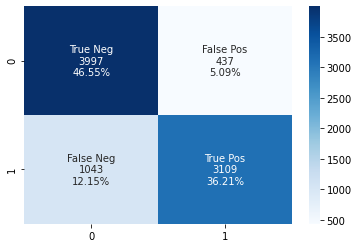

In [112]:
from sklearn.metrics import confusion_matrix,classification_report
group_names = ['True Neg','False Pos','False Neg','True Pos']
results = confusion_matrix(y_test, predictions) 
group_counts = ['{0:0.0f}'.format(value) for value in results.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(results, annot=labels, fmt='', cmap='Blues')
print('Accuracy Score :',accuracy_score(y_test, predictions))
print('Report : ')
print(classification_report(y_test, predictions))